# Упражнение 5.1

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2024-05-28 18:39:07--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2024-05-28 18:39:07--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48574 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.44K  --.-KB/s    in 0.01s   

2024-05-28 18:39:08 (4.13 MB/s) - ‘thinkdsp.py’ saved [48574/48574]



В файле chap05.ipynb блокнота Jupyter есть приложение, которое позволяет вычислить автокорреляцию для разных задержек (lag). Мы можем измерить высоты тона вокального чирпа для разных времен начала сегмента.

In [2]:
import numpy as np

def serial_corr(wave, lag=1):
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n-lag]
    corr_mat = np.corrcoef(y1, y2)
    return corr_mat[0, 1]

In [3]:
def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [5]:
from thinkdsp import read_wave
wave = read_wave('vocal.wav')
wave.make_audio()

In [6]:
wave1 = wave.segment(start = 6, duration = 1)
wave1.make_audio()

In [7]:
wave2 = wave.segment(start = 1, duration = 1)
wave2.make_audio()

Вычислим автокорреляцию сначала звука "И", а потом звука "О".

In [8]:
lags, corrs = autocorr(wave1)

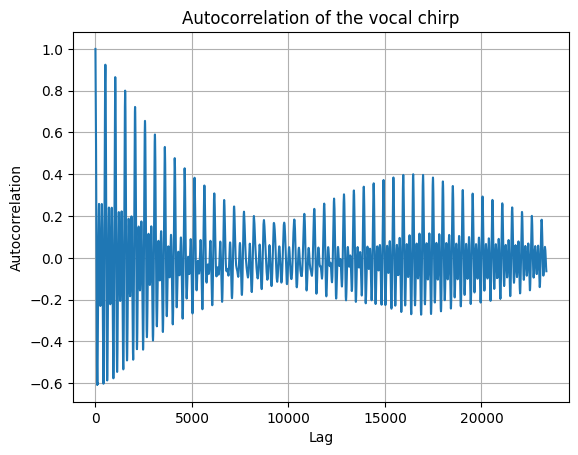

In [9]:
import matplotlib.pyplot as plt

plt.plot(lags, corrs)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the vocal chirp')
plt.grid(True)
plt.show()

In [10]:
lags1, corrs1 = autocorr(wave2)

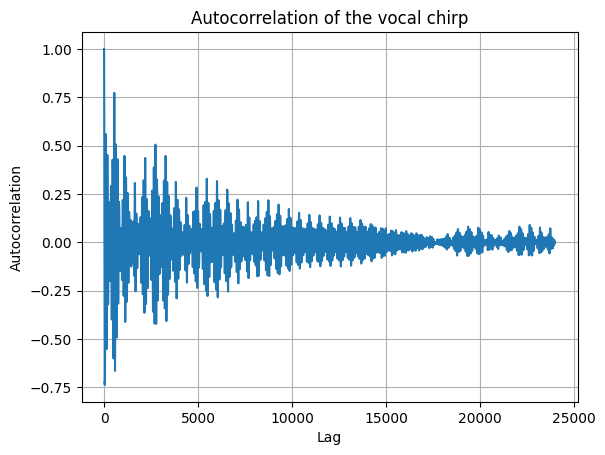

In [11]:
plt.plot(lags1, corrs1)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the vocal chirp')
plt.grid(True)
plt.show()

Были использованы звуки "И" и "О" в качестве примеров. На графике, отображающем звук "И", можно наблюдать изменение частоты звуковой волны со временем. Такое явление часто наблюдается при произнесении определенных звуков, когда голосовые связки человека переходят от одного резонансного состояния к другому. Однако на графике, представляющем звук "О", подобных изменений не наблюдается.

# Упражнение 5.2

Кодовый пример из chap05.ipynb демонстрирует, как применить автокорреляцию для оценки основной частоты периодического сигнала.

Мы можем создать функцию с названием estimate_fundamental, которая инкапсулирует этот код, и затем использовать её для отслеживания высоты тона записанного звука.

Для этого выберем звук из уже имеющегося списка в папке проекта ThinkDSP.

In [12]:
from thinkdsp import read_wave

wave = read_wave('vocal.wav')
wave.normalize()
wave.make_audio()

Далее создадим спектограмму.

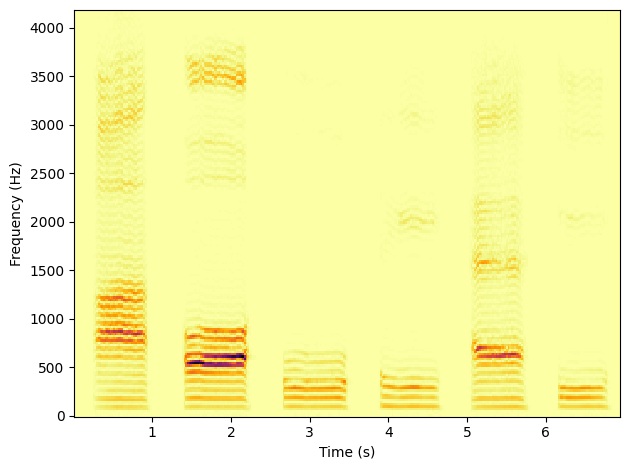

In [13]:
from thinkdsp import decorate

wave.make_spectrogram(2048).plot(high=4200)
decorate(xlabel='Time (s)',
         ylabel='Frequency (Hz)')

Напишем функцию estimate_fundamental.

In [14]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

Далее можем посмотреть, как она работает.

In [15]:
duration = 0.01
segment = wave.segment(start=0.2, duration=duration)
freq = estimate_fundamental(segment)
freq

335.6643356643356

Результат получился 335.6643356643356

Далее в коде ts - это середина каждого сегмента.

In [16]:
step = 0.05
starts = np.arange(0.0, 1.4, step)

ts = []
freqs = []

for start in starts:
    ts.append(start + step/2)
    segment = wave.segment(start=start, duration=duration)
    freq = estimate_fundamental(segment)
    freqs.append(freq)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Ниже будет показана кривая изменения высоты тона, наложенная на спектрограмму. На этом изображении можно наблюдать, как высота тона изменяется со временем, а также соответствующие изменения спектра частот. Это может быть полезно для анализа звуковых сигналов, таких как речь или музыка.








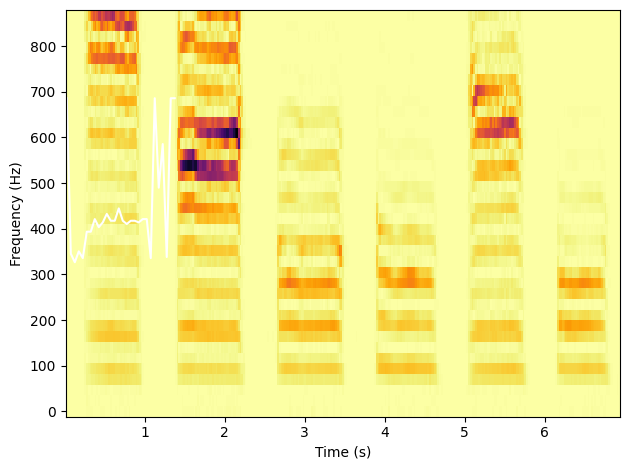

In [17]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(ts, freqs, color='white')
decorate(xlabel='Time (s)',
                     ylabel='Frequency (Hz)')

Убедились, что все работает исправно.

# Упражнение 5.3

Используя исторические данные BitCoin, вычислите автокорреляцию цен в данной платежной системе. Быстро ли уменьшается автокорреляционная функция? Есть ли признаки периодичности процесса? Используйте исторические данные, хранящиеся в папке проекта ThinkDSP.

Для начала создадим pandas dataframe на основе имеющихся данных.

In [19]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv',
                 parse_dates=[0])

ys = df['Closing Price (USD)']
ts = df.index

Построим график цены биткоина.

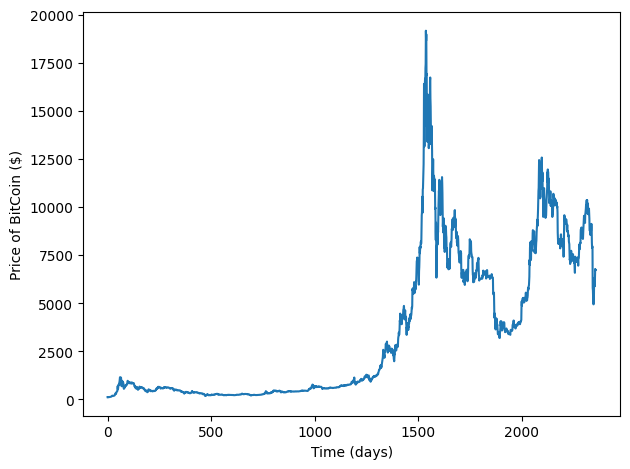

In [20]:
from thinkdsp import Wave

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)',
         ylabel='Price of BitCoin ($)')

Построим график автокорреляции с использованием функций serial_corr и autocorr.

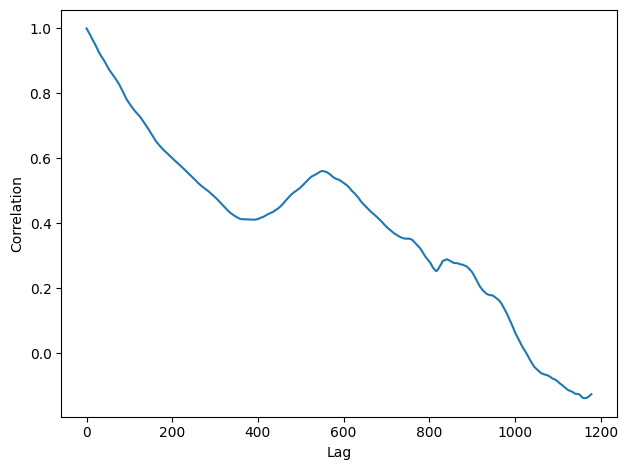

In [21]:
result = autocorr(wave)
lags, corrs = result
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

График показывает постепенное снижение, характерное для розового шума, с наличием корреляции при лаге = 500.

Теперь вычислим корреляцию с использованием функции np.correlate, которая не смещает и не нормализует сигнал.

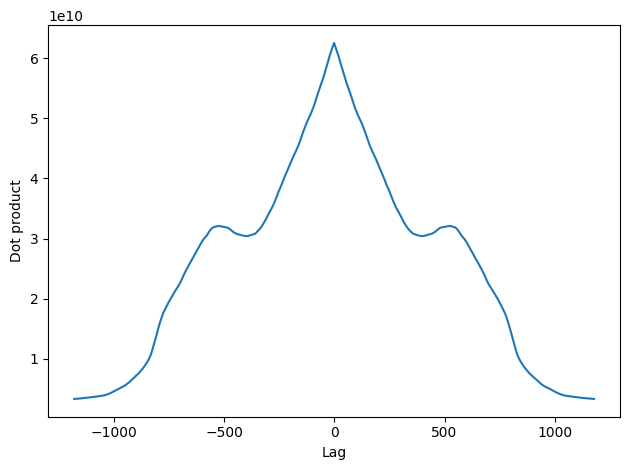

In [22]:
corrs2 = np.correlate(wave.ys, wave.ys, mode='same')
lags = np.arange(-len(wave) // 2, len(wave) // 2)
plt.plot(lags, corrs2)
decorate(xlabel='Lag',
         ylabel='Dot product')

Вторая половина результатов относится к интервалам задержек с положительными значениями. Рассмотрим ее более детально.

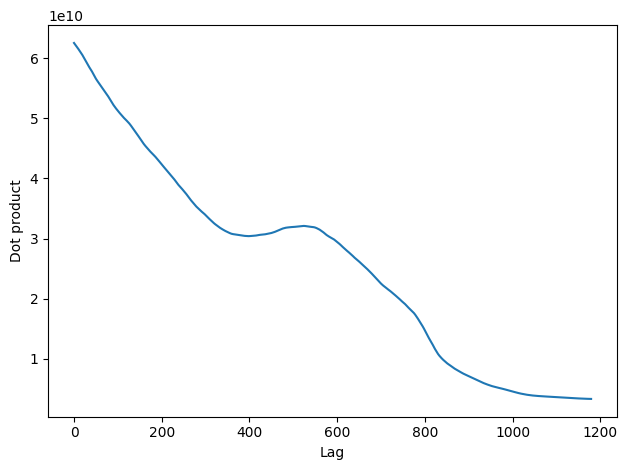

In [23]:
N = len(corrs2)
half = corrs2[N//2:]
plt.plot(half)
decorate(xlabel='Lag',
         ylabel='Dot product')

Теперь приведем разметку графика к единому виду.

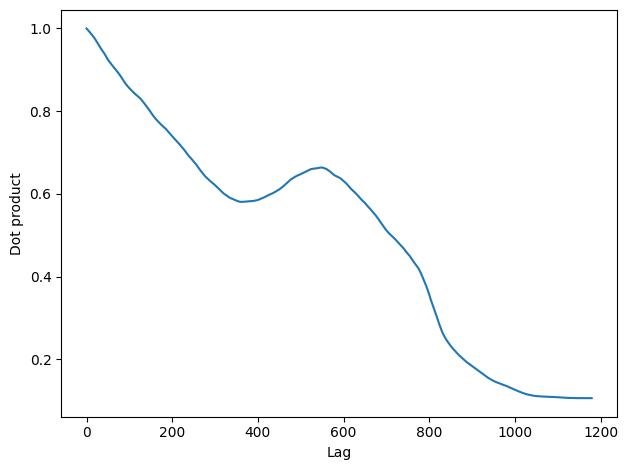

In [24]:
lengths = range(N, N//2, -1)
half /= lengths
half /= half[0]
plt.plot(half)
decorate(xlabel='Lag',
         ylabel='Dot product')

Теперь мы можем сравнить их.

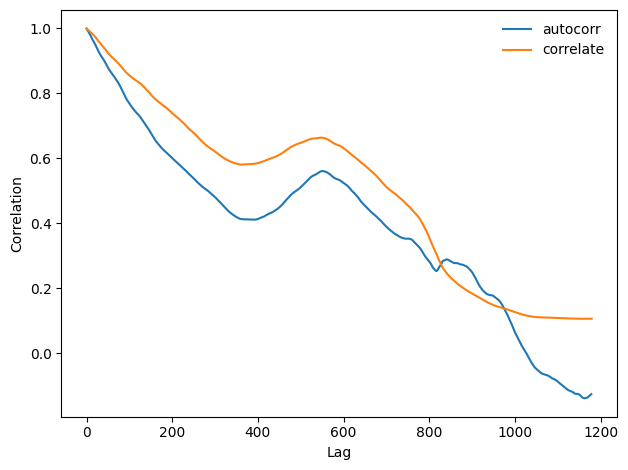

In [25]:
plt.plot(corrs, label='autocorr')
plt.plot(half, label='correlate')
decorate(xlabel='Lag', ylabel='Correlation')

Из графика видно, что функция autocorr обеспечивает более точные результаты по сравнению с функцией correlate. Признаков периодичности не наблюдается. Автокорреляционная функция спадает постепенно.